# Notes
- We know that there is an alaytical formula for calculating the weights $(X'X)^{-1} X' Y$
- We verify that we achieve the same solution with gradient descent approach.
- The challenge is that the answer depends on the value of the learning rate parameter. 
    - For big values the solution oscilates.
    - For small values it takes a lot of time to converge to the correct solution. (How do we set number of iterations?)

In [17]:
import jax
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [4]:
plt.style.use("fivethirtyeight")

In [24]:
xs = np.random.normal(size=(100_000, 2))
noise = np.random.normal(scale=2, size=(100_000, ))
ys = xs.dot(np.array([5,2])) + noise

In [25]:
X = jnp.array(xs)
Y = jnp.array(ys)

In [54]:
#%%timeit
np.linalg.pinv(X).dot(Y)

array([5.0006604, 2.006071 ], dtype=float32)

In [55]:
#%%timeit
reg = LinearRegression().fit(X, Y)

In [56]:
reg.coef_

array([5.000661 , 2.0060718], dtype=float32)

In [8]:
def model(theta, x):
  """Computes wx + b on a batch of input x."""
  #w, b = theta
  return x.dot(theta)

In [70]:
def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)

In [63]:
def update(theta, x, y, lr=0.1):
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

In [11]:
update_jit = jax.jit(update)

In [84]:
#%%timeit
n = 50
initial_weights = [-4., -2.]
thetas = []
losses = []

theta = jnp.array(initial_weights)
for _ in range(n):
  theta = update_jit(theta, X, Y, lr=0.1)
  losses.append(loss_fn(theta, X, Y))
  thetas.append(theta)

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")

w: 5.00, b: 2.01


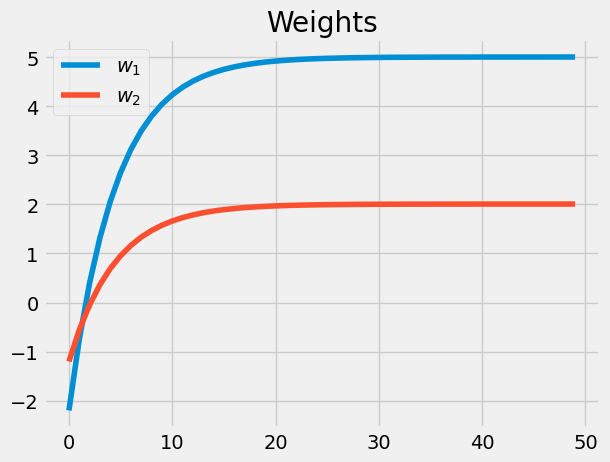

In [88]:
plt.plot(thetas, label=[r"$w_1$", "$w_2$"]);
plt.title("Weights")
plt.legend()

Text(0.5, 1.0, 'Loss Function')

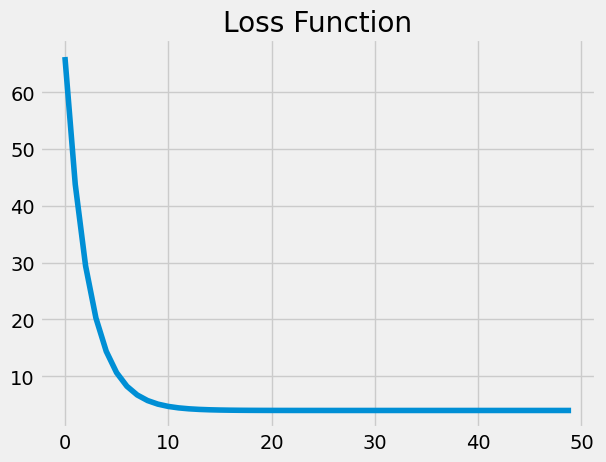

In [87]:
plt.plot(losses)
plt.title("Loss Function")